In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# 指定Google Drive云端硬盘的根目录，名为drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# 指定當前的工作資料夾
import os
# 此處為google drive中的檔案路徑,drive為之前指定的工作根目錄，要加上
os.chdir("drive/Colab Notebooks") 

In [0]:
os.chdir("0713")

In [0]:
ls

0607_XGBoost_colab_version.ipynb  result0713B_1.csv  test_1w_0713A.csv
0713CD.ipynb                      result0713B_2.csv  test_1w_0713B.csv
result0713A_1.csv                 result0713B_3.csv  test.csv
result0713A_2.csv                 result0713B_4.csv  train_6w_0713A.csv
result0713A_3.csv                 result0713B_5.csv  train_6w_0713B.csv
result0713A_4.csv                 result0713B.csv    train.csv
result0713A.csv                   submit_test.csv


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
%matplotlib inline

#匯入檔案

In [0]:
train_df = pd.read_csv("train.csv",encoding="utf-8")
test_df = pd.read_csv("test.csv",encoding="utf-8")
train_df

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,...,XII_100,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,NaN,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,...,5,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,NaN,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,...,14,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,NaN,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,...,12,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,81138.889762,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,...,2,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,NaN,NaN,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,...,0,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05
5,HmW2MkrwafmceWAH,8,21,18394,5,1,2,6576,2,NaN,NaN,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,...,2,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05
6,ITYyim3zx6DQyCoF,8,7,20474,15,0,2,16559,0,NaN,61488.568950,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,...,3,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06
7,KFrxqaWZaLynrOae,8,12,18185,8,3,2,11934,1,NaN,6721.823057,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,...,8,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06
8,ZiK0gY7A0BvwZ8OV,8,21,18794,5,1,2,7640,2,NaN,NaN,1.0,13.106100,4.041309,49,-39.19,117.08,5

#查遺漏值

In [0]:
train_df.isna().sum()

building_id                    0
building_material              0
city                           0
txn_dt                         0
total_floor                    0
building_type                  0
building_use                   0
building_complete_dt           0
parking_way                    0
parking_area               56897
parking_price              46065
txn_floor                  15902
land_area                      0
building_area                  0
town                           0
lat                            0
lon                            0
village_income_median       1142
town_population                0
town_area                      0
town_population_density        0
doc_rate                       0
master_rate                    0
bachelor_rate                  0
jobschool_rate                 0
highschool_rate                0
junior_rate                    0
elementary_rate                0
born_rate                      0
death_rate                     0
          

#train丟 building_id,parking_area,parking_price

In [0]:
train_df = train_df.drop(["building_id"], axis = 1)
train_df = train_df.drop(["parking_area"], axis = 1)
train_df = train_df.drop(["parking_price"], axis = 1)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_100,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,5,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,14,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,12,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,2,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,1,21,20657,2,4,2,6880,2,NaN,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,0,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05
5,8,21,18394,5,1,2,6576,2,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,2,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05
6,8,7,20474,15,0,2,16559,0,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,3,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06
7,8,12,18185,8,3,2,11934,1,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,8,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06
8,8,21,18794,5,1,2,7640,2,1.0,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,3,9,27,1,63,1,3805,1,9264,1,70.849715,0,0,0,0,0,2,1,4,1,97,1,281,1,445.639

#test丟 building_id,parking_area,parking_price

In [0]:
test_df = test_df.drop(["building_id"], axis = 1)
test_df = test_df.drop(["parking_area"], axis = 1)
test_df = test_df.drop(["parking_price"], axis = 1)
test_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_index_50,XII_100,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,1,13,18634,2,4,2,1857,2,NaN,40.317789,3.418175,66,-37.72,119.45,714.0,122155.0,21.8424,5593.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,160,1,13,14,14,14,0,0,0,0,2,...,0,4,28,74,1,182,1,3813,1,14640,1,65.480263,0,0,0,0,20,24,1,25,1,501,1,1502,1,100.611287,0,0,0,0,7,21,1,129,1,3991,1,8409,1,105.462231
1,8,7,20199,10,3,2,16011,2,2.0,18.144460,7.726227,4,-37.70,119.17,583.0,114926.0,191.4508,600.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,843,0,8,12,14,14,0,0,0,1,1,...,0,3,8,22,1,82,1,1012,1,4576,1,63.534081,0,0,0,1,1,2,1,3,1,28,1,298,1,95.594156,0,0,0,0,18,44,1,67,1,1950,1,10725,1,100.819809
2,8,12,19769,4,4,10,18294,2,NaN,47.912742,12.170581,52,-38.03,118.24,641.0,274819.0,62.7034,4383.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,645,1,9,11,14,14,0,0,0,0,0,...,1,1,3,25,1,123,1,3072,1,11765,1,26.913148,0,0,0,0,0,0,0,0,0,21,1,146,1,2850.419308,0,0,0,0,0,3,1,35,1,3707,1,19459,1,259.800543
3,10,7,20479,19,2,0,17837,2,16.0,2.222000,2.252256,204,-37.70,119.34,653.0,222585.0,5.7138,38956.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,461,10,14,14,14,14,0,0,0,0,4,...,1,12,65,221,1,754,1,13918,1,33527,1,0.550144,0,0,0,5,6,16,1,26,1,715,1,2499,1,84.444073,0,2,1,5,16,60,1,144,1,6487,1,29400,1,22.941906
4,8,3,18164,13,0,2,13272,2,3.0,11.387227,5.813985,169,-37.74,119.59,624.0,38708.0,22.8283,1696.0,0.002326,0.035660,0.182036,0.102728,0.343145,0.190980,0.143125,6.04,7.88,5.76,2.78,2390,2,11,13,14,14,0,0,0,0,2,...,0,1,16,44,1,109,1,1331,1,2412,1,70.134097,0,0,0,0,1,2,1,3,1,54,1,87,1,172.571716,0,0,0,0,4,18,1,76,1,1346,1,3280,1,181.213095
5,8,12,18632,4,4,2,15464,2,NaN,37.242047,11.623768,216,-37.86,118.14,607.0,86420.0,64.1709,1347.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,556,0,8,12,14,14,0,0,0,0,0,...,0,0,5,23,1,61,1,928,1,1754,1,162.459217,0,0,0,0,0,0,0,1,1,6,1,17,1,876.781463,0,0,0,0,7,19,1,88,1,2144,1,5477,1,206.701060
6,8,7,19144,14,0,2,16590,0,11.0,13.106100,8.475077,10,-37.63,119.36,641.0,387484.0,16.3170,23747.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,237,3,13,13,14,14,0,0,0,0,3,...,1,4,40,136,1,393,1,9134,1,29438,1,9.100093,0,0,0,0,1,2,1,5,1,520,1,2186,1,154.378847,0,0,0,1,17,64,1,380,1,9419,1,23499,1,77.249329
7,8,13,19452,5,1,2,7124,2,3.0,14.803422,3.830869,148,-37.73,119.36,803.0,274424.0,31.5090,8709.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,2924,0,13,14,14,14,0,0,0,0,4,...,0,3,18,73,1,390,1,7238,1,25451,1,53.146217,0,0,0,0,3,4,1,22,1,457,1,1820,1,168.296432,0,0,0,0,3,22,1,273,1,2729,1,12880,1,155.031982
8,1,17,19045,2,4,2,12634,2,NaN,64.242549,10.283420,144,-37.67,118.52,547.0,36750.0,75.8079,485.0,0.002162,0.035932,0.180224,0.084696,0.331434,0.205736,0.159817,6.95,9.05,5.44,2.33,1712,1,3,7,14,14,0,0,0,0,0,...,1,1,1,2,1,5,1,162,1,830,1,0.211802,0,0,0,0,0,0,0,2,1,2,1,10,1,786.028882,0,0,0,1,2,11,1,27,1,459,1,1693,1,81.407991
9,8,7,19220,13,2,10,17351,2,10.0,4.181031,2.438421,1

# train 增加變數
# total_land

In [0]:
train_df["total_land"] = train_df["building_area"] + train_df["land_area"]
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258
4,1,21,20657,2,4,2,6880,2,NaN,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633
5,8,21,18394,5,1,2,6576,2,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554
6,8,7,20474,15,0,2,16559,0,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455
7,8,12,18185,8,3,2,11934,1,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245
8,8,21,18794,5,1,2,7640,2,1.0,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,9,27,1,63

# test 增加變數
# total_land

In [0]:
test_df["total_land"] = test_df["building_area"] + test_df["land_area"]
test_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_100,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_land
0,1,13,18634,2,4,2,1857,2,NaN,40.317789,3.418175,66,-37.72,119.45,714.0,122155.0,21.8424,5593.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,160,1,13,14,14,14,0,0,0,0,2,...,4,28,74,1,182,1,3813,1,14640,1,65.480263,0,0,0,0,20,24,1,25,1,501,1,1502,1,100.611287,0,0,0,0,7,21,1,129,1,3991,1,8409,1,105.462231,43.735964
1,8,7,20199,10,3,2,16011,2,2.0,18.144460,7.726227,4,-37.70,119.17,583.0,114926.0,191.4508,600.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,843,0,8,12,14,14,0,0,0,1,1,...,3,8,22,1,82,1,1012,1,4576,1,63.534081,0,0,0,1,1,2,1,3,1,28,1,298,1,95.594156,0,0,0,0,18,44,1,67,1,1950,1,10725,1,100.819809,25.870688
2,8,12,19769,4,4,10,18294,2,NaN,47.912742,12.170581,52,-38.03,118.24,641.0,274819.0,62.7034,4383.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,645,1,9,11,14,14,0,0,0,0,0,...,1,3,25,1,123,1,3072,1,11765,1,26.913148,0,0,0,0,0,0,0,0,0,21,1,146,1,2850.419308,0,0,0,0,0,3,1,35,1,3707,1,19459,1,259.800543,60.083323
3,10,7,20479,19,2,0,17837,2,16.0,2.222000,2.252256,204,-37.70,119.34,653.0,222585.0,5.7138,38956.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,461,10,14,14,14,14,0,0,0,0,4,...,12,65,221,1,754,1,13918,1,33527,1,0.550144,0,0,0,5,6,16,1,26,1,715,1,2499,1,84.444073,0,2,1,5,16,60,1,144,1,6487,1,29400,1,22.941906,4.474256
4,8,3,18164,13,0,2,13272,2,3.0,11.387227,5.813985,169,-37.74,119.59,624.0,38708.0,22.8283,1696.0,0.002326,0.035660,0.182036,0.102728,0.343145,0.190980,0.143125,6.04,7.88,5.76,2.78,2390,2,11,13,14,14,0,0,0,0,2,...,1,16,44,1,109,1,1331,1,2412,1,70.134097,0,0,0,0,1,2,1,3,1,54,1,87,1,172.571716,0,0,0,0,4,18,1,76,1,1346,1,3280,1,181.213095,17.201212
5,8,12,18632,4,4,2,15464,2,NaN,37.242047,11.623768,216,-37.86,118.14,607.0,86420.0,64.1709,1347.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,556,0,8,12,14,14,0,0,0,0,0,...,0,5,23,1,61,1,928,1,1754,1,162.459217,0,0,0,0,0,0,0,1,1,6,1,17,1,876.781463,0,0,0,0,7,19,1,88,1,2144,1,5477,1,206.701060,48.865815
6,8,7,19144,14,0,2,16590,0,11.0,13.106100,8.475077,10,-37.63,119.36,641.0,387484.0,16.3170,23747.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,237,3,13,13,14,14,0,0,0,0,3,...,4,40,136,1,393,1,9134,1,29438,1,9.100093,0,0,0,0,1,2,1,5,1,520,1,2186,1,154.378847,0,0,0,1,17,64,1,380,1,9419,1,23499,1,77.249329,21.581176
7,8,13,19452,5,1,2,7124,2,3.0,14.803422,3.830869,148,-37.73,119.36,803.0,274424.0,31.5090,8709.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,2924,0,13,14,14,14,0,0,0,0,4,...,3,18,73,1,390,1,7238,1,25451,1,53.146217,0,0,0,0,3,4,1,22,1,457,1,1820,1,168.296432,0,0,0,0,3,22,1,273,1,2729,1,12880,1,155.031982,18.634292
8,1,17,19045,2,4,2,12634,2,NaN,64.242549,10.283420,144,-37.67,118.52,547.0,36750.0,75.8079,485.0,0.002162,0.035932,0.180224,0.084696,0.331434,0.205736,0.159817,6.95,9.05,5.44,2.33,1712,1,3,7,14,14,0,0,0,0,0,...,1,1,2,1,5,1,162,1,830,1,0.211802,0,0,0,0,0,0,0,2,1,2,1,10,1,786.028882,0,0,0,1,2,11,1,27,1,459,1,1693,1,81.

In [0]:
print("Skewness: %f" % test_df['total_land'].skew())
print("Kurtosis: %f" % test_df['total_land'].kurt())

Skewness: 38.319421
Kurtosis: 2348.511717


# train txn_floor遺漏值補1

In [0]:
train_df["txn_floor"] = train_df["txn_floor"].fillna(1)
train_df["txn_floor"]

0         3.0
1         5.0
2         1.0
3        13.0
4         1.0
5         4.0
6         8.0
7         4.0
8         1.0
9         2.0
10        1.0
11        1.0
12        7.0
13        3.0
14        9.0
15        1.0
16        1.0
17        5.0
18        7.0
19        1.0
20        5.0
21        1.0
22        1.0
23        4.0
24        4.0
25        8.0
26        3.0
27        4.0
28        1.0
29        4.0
         ... 
59970     3.0
59971     5.0
59972     2.0
59973     1.0
59974     2.0
59975     1.0
59976     1.0
59977     3.0
59978     3.0
59979     1.0
59980     5.0
59981     1.0
59982     5.0
59983    16.0
59984     5.0
59985     1.0
59986     8.0
59987     1.0
59988     1.0
59989     1.0
59990     4.0
59991     2.0
59992     6.0
59993     1.0
59994     2.0
59995     1.0
59996     7.0
59997     6.0
59998     3.0
59999     4.0
Name: txn_floor, Length: 60000, dtype: float64

#train遺漏值補中位數

In [0]:
med = train_df.median()
train_df = train_df.fillna(med)
train_df.isna().sum()

building_material          0
city                       0
txn_dt                     0
total_floor                0
building_type              0
building_use               0
building_complete_dt       0
parking_way                0
txn_floor                  0
land_area                  0
building_area              0
town                       0
lat                        0
lon                        0
village_income_median      0
town_population            0
town_area                  0
town_population_density    0
doc_rate                   0
master_rate                0
bachelor_rate              0
jobschool_rate             0
highschool_rate            0
junior_rate                0
elementary_rate            0
born_rate                  0
death_rate                 0
marriage_rate              0
divorce_rate               0
village                    0
                          ..
XIII_10                    0
XIII_50                    0
XIII_index_50              0
XIII_100      

# test txn_floor遺漏值補1

In [0]:
test_df['txn_floor'] = test_df['txn_floor'].fillna(1)
test_df['txn_floor']

0        1.0
1        2.0
2        1.0
3       16.0
4        3.0
5        1.0
6       11.0
7        3.0
8        1.0
9       10.0
10       1.0
11       2.0
12       9.0
13       1.0
14       1.0
15       6.0
16       7.0
17       1.0
18       7.0
19      13.0
20       4.0
21       2.0
22       7.0
23       1.0
24       8.0
25       1.0
26       1.0
27      11.0
28       1.0
29       1.0
        ... 
9970    12.0
9971     5.0
9972     1.0
9973     1.0
9974     1.0
9975     4.0
9976     4.0
9977    11.0
9978     1.0
9979     4.0
9980     2.0
9981    25.0
9982     7.0
9983    12.0
9984     1.0
9985     4.0
9986     3.0
9987     5.0
9988     2.0
9989     1.0
9990     1.0
9991     9.0
9992     7.0
9993     6.0
9994    10.0
9995     4.0
9996     2.0
9997     1.0
9998     2.0
9999     6.0
Name: txn_floor, Length: 10000, dtype: float64

#test遺漏值補中位數

In [0]:
tmd = test_df.median()
test_df = test_df.fillna(tmd)
test_df.isna().sum()

building_material          0
city                       0
txn_dt                     0
total_floor                0
building_type              0
building_use               0
building_complete_dt       0
parking_way                0
txn_floor                  0
land_area                  0
building_area              0
town                       0
lat                        0
lon                        0
village_income_median      0
town_population            0
town_area                  0
town_population_density    0
doc_rate                   0
master_rate                0
bachelor_rate              0
jobschool_rate             0
highschool_rate            0
junior_rate                0
elementary_rate            0
born_rate                  0
death_rate                 0
marriage_rate              0
divorce_rate               0
village                    0
                          ..
XII_MIN                    0
XIII_10                    0
XIII_50                    0
XIII_index_50 

#train 踢掉離群值


In [0]:
train_df = train_df.drop(train_df[train_df['total_land'] > 320].index)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258
4,1,21,20657,2,4,2,6880,2,1.0,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633
5,8,21,18394,5,1,2,6576,2,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554
6,8,7,20474,15,0,2,16559,0,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455
7,8,12,18185,8,3,2,11934,1,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245
8,8,21,18794,5,1,2,7640,2,1.0,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,9,27,1,63

In [0]:
#train_df = train_df.drop(train_df[train_df['total_price'] > 1000000000].index)
#train_df

In [0]:
print("Skewness: %f" % train_df['total_land'].skew())
print("Kurtosis: %f" % train_df['total_land'].kurt())

In [0]:
train_df = train_df.drop(train_df[train_df['land_area'] > 300].index)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258
4,1,21,20657,2,4,2,6880,2,1.0,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633
5,8,21,18394,5,1,2,6576,2,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554
6,8,7,20474,15,0,2,16559,0,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455
7,8,12,18185,8,3,2,11934,1,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245
8,8,21,18794,5,1,2,7640,2,1.0,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,9,27,1,63

In [0]:
print("Skewness: %f" % train_df['land_area'].skew())
print("Kurtosis: %f" % train_df['land_area'].kurt())

In [0]:
train_df = train_df.drop(train_df[train_df['building_area'] > 80].index)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258
4,1,21,20657,2,4,2,6880,2,1.0,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633
5,8,21,18394,5,1,2,6576,2,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554
6,8,7,20474,15,0,2,16559,0,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455
7,8,12,18185,8,3,2,11934,1,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245
8,8,21,18794,5,1,2,7640,2,1.0,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,9,27,1,63

In [0]:
print("Skewness: %f" % train_df['building_area'].skew())
print("Kurtosis: %f" % train_df['building_area'].kurt())

Skewness: 2.987664
Kurtosis: 13.557578


In [0]:
train_df = train_df.drop(train_df[train_df['total_price'] > 500000000].index)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land
0,8,21,18674,4,3,2,6271,2,3.0,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,25,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636
1,8,7,18800,5,1,2,7885,2,5.0,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,45,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536
2,8,7,19289,4,1,2,6028,2,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,49,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081
3,8,21,20385,24,0,2,18325,0,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,7,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258
4,1,21,20657,2,4,2,6880,2,1.0,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,5,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633
5,8,21,18394,5,1,2,6576,2,4.0,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,20,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554
6,8,7,20474,15,0,2,16559,0,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,16,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455
7,8,12,18185,8,3,2,11934,1,4.0,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,18,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245
8,8,21,18794,5,1,2,7640,2,1.0,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,9,27,1,63

#train  
#嘗試各種年份折舊概念的變數：year_class ;  year ; year_land ; building_depr ; land_appr ;year_appr

In [0]:
#year_class 3級
year = (train_df["txn_dt"]-train_df["building_complete_dt"])/365
train_df["new"] = (year<=1)*3
train_df["old"] = (year>=20)*1
train_df["year_class"] = train_df["new"] + train_df["old"] 
train_df["year_class"] = train_df["year_class"].replace(0,2)
train_df = train_df.drop(["new"], axis = 1)
train_df = train_df.drop(["old"], axis = 1)
train_df["year_class"]

In [0]:
#year_class 5級
year = (train_df["txn_dt"]-train_df["building_complete_dt"])/365
train_df["5"] = (year<=1)*5
train_df["4"] = ((year>1) & (year<=10))*4
train_df["3"] = ((year>10) & (year<=20))*3
train_df["2"] = ((year>20) & (year<=30))*2
train_df["1"] = (year>30)*1
train_df["year_class"] = train_df["5"] + train_df["4"]+ train_df["3"] + train_df["2"] + train_df["1"]  
train_df = train_df.drop(["5"], axis = 1)
train_df = train_df.drop(["4"], axis = 1)
train_df = train_df.drop(["3"], axis = 1)
train_df = train_df.drop(["2"], axis = 1)
train_df = train_df.drop(["1"], axis = 1)
train_df["year_class"]

0        1
1        2
2        1
3        4
4        1
5        1
6        3
7        3
8        1
9        2
10       2
11       4
12       2
13       1
14       2
15       3
16       1
17       2
18       3
19       2
20       3
21       1
22       1
23       2
24       4
25       4
26       4
27       1
28       4
29       2
        ..
59970    1
59971    1
59972    2
59973    1
59974    1
59975    1
59976    2
59977    1
59978    2
59979    3
59980    1
59981    1
59982    2
59983    3
59984    1
59985    3
59986    2
59987    1
59988    1
59989    1
59990    1
59991    1
59992    3
59993    1
59994    1
59995    2
59996    4
59997    3
59998    1
59999    1
Name: year_class, Length: 59612, dtype: int64

In [0]:
#train_df["building_depr"] = train_df["building_area"] / (train_df["txn_dt"] - train_df["building_complete_dt"])*365
#import numpy as np
#train_df['building_depr']=np.log1p(train_df['building_depr'])
#print("Skewness: %f" % train_df['building_depr'].skew())
#print("Kurtosis: %f" % train_df['building_depr'].kurt())
train_df["building_depr"] = (train_df["building_area"] * train_df["building_complete_dt"]/365)
train_df["building_depr"]
#train_df["building_depr"] = train_df["building_area"] * train_df["building_complete_dt"]/train_df["txn_dt"]
#train_df["building_depr"]


In [0]:
train_df["land_appr"] = (train_df["txn_dt"] /365 * train_df["land_area"])
train_df["land_appr"]


In [0]:
train_df["year"] = (train_df["txn_dt"]-train_df["building_complete_dt"])/365
train_df["year"]

In [0]:
train_df["year_land"] = (train_df["txn_dt"]/train_df["building_complete_dt"]*train_df["land_area"])
train_df["year_land"]
#train_df["year_appr"] = train_df["txn_dt"]/train_df["building_complete_dt"]
#train_df["year_appr"]

0         54.031199
1         27.150270
2         68.563633
3         12.667320
4        184.071057
5         41.407261
6         14.079479
7         17.351829
8         32.240319
9         23.006517
10       259.319541
11        54.242996
12        18.718703
13        96.115875
14        18.585575
15        74.142463
16        25.796495
17        22.815048
18        15.302157
19        36.843287
20        29.214496
21       162.231662
22        90.798910
23        38.704495
24        11.130893
25         7.328331
26        29.727623
27        31.529331
28        51.572089
29        12.579085
            ...    
59970     16.452788
59971     36.811775
59972     82.167169
59973    134.107956
59974     50.213083
59975    206.561065
59976     97.735489
59977     54.767544
59978      7.577653
59979     56.633812
59980     43.400138
59981    169.621654
59982     18.502326
59983     12.463026
59984     48.601321
59985     56.285420
59986     15.541092
59987     94.889179
59988     98.565559


# 分析畫圖

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


KeyError: ignored

<Figure size 432x288 with 0 Axes>

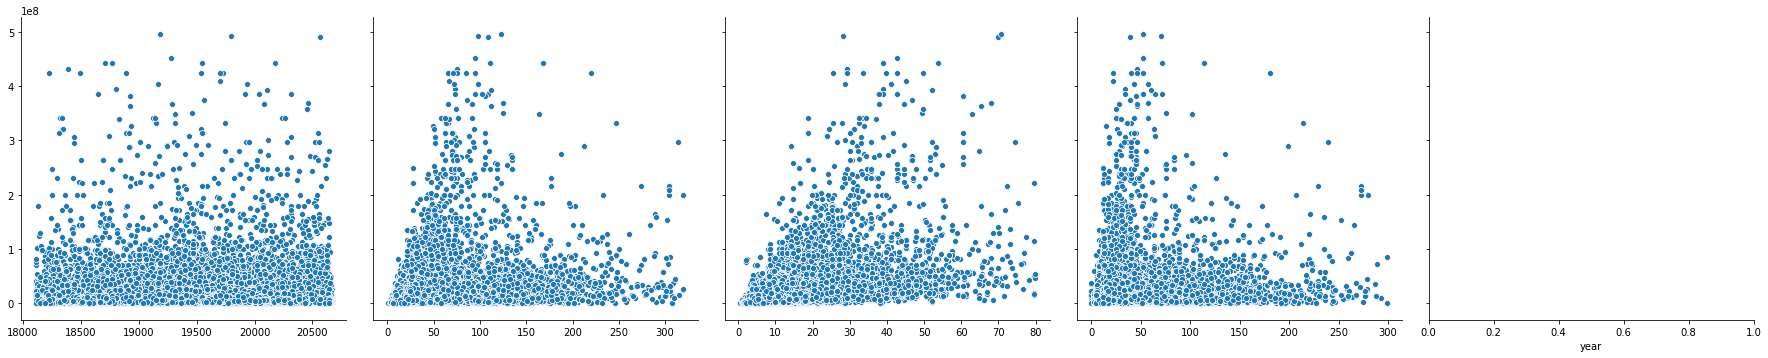

In [0]:
figure=plt.figure()
sns.pairplot(x_vars=['txn_dt','total_land','building_area','land_area','year'],y_vars=['total_price'],data=train_df,dropna=True, size = 5)
plt.show()

#test
#嘗試各種年份折舊概念的變數：year_class ;  year ; year_land ; building_depr ; land_appr ;year_appr


In [0]:
#year_class 3級
year = (test_df["txn_dt"]-test_df["building_complete_dt"])/365
test_df["new"] = (year<=1)*3
test_df["old"] = (year>=20)*1
test_df["year_class"] = test_df["new"] + test_df["old"] 
test_df["year_class"] = test_df["year_class"].replace(0,2)
test_df = test_df.drop(["new"], axis = 1)
test_df = test_df.drop(["old"], axis = 1)
test_df["year_class"]

In [0]:
#year_class 5級
year = (test_df["txn_dt"]-test_df["building_complete_dt"])/365
test_df["5"] = (year<=1)*5
test_df["4"] = ((year>1) & (year<=10))*4
test_df["3"] = ((year>10) & (year<=20))*3
test_df["2"] = ((year>20) & (year<=30))*2
test_df["1"] = (year>30)*1
test_df["year_class"] = test_df["5"] + test_df["4"]+ test_df["3"] + test_df["2"] + test_df["1"]  
test_df = test_df.drop(["5"], axis = 1)
test_df = test_df.drop(["4"], axis = 1)
test_df = test_df.drop(["3"], axis = 1)
test_df = test_df.drop(["2"], axis = 1)
test_df = test_df.drop(["1"], axis = 1)
test_df["year_class"]

0       1
1       3
2       4
3       4
4       3
5       4
6       4
7       1
8       3
9       4
10      1
11      2
12      3
13      1
14      4
15      2
16      2
17      1
18      3
19      3
20      1
21      1
22      2
23      2
24      4
25      1
26      1
27      4
28      1
29      1
       ..
9970    3
9971    2
9972    1
9973    1
9974    4
9975    2
9976    1
9977    4
9978    2
9979    3
9980    2
9981    3
9982    1
9983    4
9984    3
9985    4
9986    2
9987    3
9988    2
9989    1
9990    2
9991    1
9992    3
9993    4
9994    2
9995    2
9996    4
9997    2
9998    2
9999    2
Name: year_class, Length: 10000, dtype: int64

In [0]:
#test_df["building_depr"] = test_df["building_area"] / (test_df["txn_dt"] - test_df["building_complete_dt"])*365
#import numpy as np
#test_df['building_depr']=np.log1p(test_df['building_depr'])
#print("Skewness: %f" % test_df['building_depr'].skew())
#print("Kurtosis: %f" % test_df['building_depr'].kurt())
test_df["building_depr"] = test_df["building_area"] * test_df["building_complete_dt"]/365
test_df["building_depr"]
#test_df["building_depr"] = test_df["building_area"] * test_df["building_complete_dt"]/test_df["txn_dt"]
#test_df["building_depr"]

In [0]:
test_df["year"] = (test_df["txn_dt"]-test_df["building_complete_dt"])/365
test_df["year"]

In [0]:
test_df["year_land"] = (test_df["txn_dt"]/test_df["building_complete_dt"]*test_df["land_area"])
test_df["year_land"]
#test_df["year_appr"] = test_df["txn_dt"]/test_df["building_complete_dt"]
#test_df["year_appr"]

0       404.567409
1        22.890510
2        51.775828
3         2.551121
4        15.584509
5        44.871561
6        15.123760
7        40.420574
8        96.841804
9         4.631400
10       23.690478
11       26.531716
12       11.505883
13      353.502255
14       62.632750
15       48.939280
16       19.575371
17      170.467480
18       16.865577
19        7.724638
20       75.724020
21       77.668213
22       27.931082
23       14.510494
24       13.873116
25      262.539981
26       75.514499
27        6.627969
28       80.874135
29       37.265242
           ...    
9970      9.281575
9971     55.818764
9972    156.677690
9973    172.124712
9974     48.378911
9975      9.924914
9976    390.418324
9977     14.999961
9978     98.170265
9979      9.317963
9980     22.386209
9981      5.629751
9982     26.519148
9983     25.095699
9984     71.842154
9985     13.782847
9986     47.501292
9987     18.851861
9988     75.952606
9989     75.215009
9990    107.925775
9991      5.

In [0]:
test_df["land_appr"] = (test_df["txn_dt"] /365 * test_df["land_area"])
test_df["land_appr"]

0       2058.305970
1       1004.109461
2       2595.032885
3        124.669419
4        566.678354
5       1901.078939
6        687.405952
7        788.921005
8       3352.053019
9        220.162795
10       529.563318
11       739.035500
12       444.316226
13      2123.919029
14      2705.734819
15      1551.174067
16       630.166047
17      2772.782004
18       568.300644
19       332.413375
20       802.467150
21       823.070269
22       654.658656
23       440.522705
24       600.496860
25      5255.115350
26      1102.511680
27       305.122617
28      1571.838664
29       711.715074
           ...     
9970     311.174334
9971    1429.266205
9972    2691.851495
9973    2397.485034
9974    2142.456751
9975     337.718991
9976    1954.230897
9977     703.025550
9978    2407.188681
9979     338.050592
9980     733.654326
9981     213.622058
9982     517.595636
9983    1192.973876
9984    2648.121471
9985     628.762142
9986     990.369410
9987     779.795608
9988    1919.415994


## train 增加樓層變數 floor_class

In [0]:
typeA = train_df["total_floor"]<=5    #5樓以下公寓與透天
typeB = train_df["total_floor"]> 5    #5樓以上大樓
f = train_df["txn_floor"] 
train_df["A1"] = (typeA & (f==1))*138
train_df["A2"] = (typeA & (f==2))*106
train_df["A3"] = (typeA & (f==3))*103
train_df["A4"] = (typeA & (f==4))*100
train_df["A5"] = (typeA & (f==5))*98.5
train_df["B0"] = (typeB & (f==1))*110
train_df["B1"] = (typeB & (f>1)& (f<=3))*99
train_df["B2"] = (typeB & (f>3)& (f<=5))*100
train_df["B3"] = (typeB & (f>5)& (f<=10))*102
train_df["B4"] = (typeB & (f>10) & (f<=15))*104
train_df["B5"] = (typeB & (f>15) & (f<=20))*106
train_df["B6"] = (typeB & (f>20) & (f<=25))*108
train_df["B7"] = (typeB & (f>25) & (f<=30))*110
train_df["B8"] = (typeB & (f>30))*112
train_df["floor_class"] = train_df["A1"]+train_df["A2"]+train_df["A3"]+train_df["A4"]+train_df["A5"]+train_df["B0"]
+train_df["B1"]+train_df["B2"]+train_df["B3"]+train_df["B4"]+train_df["B5"]+train_df["B6"]+train_df["B7"]+train_df["B8"]  
train_df = train_df.drop(["A5"], axis = 1)
train_df = train_df.drop(["A4"], axis = 1)
train_df = train_df.drop(["A3"], axis = 1)
train_df = train_df.drop(["A2"], axis = 1)
train_df = train_df.drop(["A1"], axis = 1)
train_df = train_df.drop(["B0"], axis = 1)
train_df = train_df.drop(["B8"], axis = 1)
train_df = train_df.drop(["B7"], axis = 1)
train_df = train_df.drop(["B6"], axis = 1)
train_df = train_df.drop(["B5"], axis = 1)
train_df = train_df.drop(["B4"], axis = 1)
train_df = train_df.drop(["B3"], axis = 1)
train_df = train_df.drop(["B2"], axis = 1)
train_df = train_df.drop(["B1"], axis = 1)
train_df["floor_class"]

0        103.0
1         98.5
2        138.0
3        104.0
4        138.0
5        100.0
6        102.0
7        100.0
8        138.0
9         99.0
10       138.0
11       138.0
12       102.0
13       103.0
14       102.0
15       138.0
16       138.0
17       100.0
18       102.0
19       138.0
20        98.5
21       138.0
22       138.0
23       100.0
24       100.0
25       102.0
26        99.0
27       100.0
28       138.0
29       100.0
         ...  
59970     99.0
59971    100.0
59972    106.0
59973    138.0
59974    106.0
59975    138.0
59976    138.0
59977    103.0
59978     99.0
59979    138.0
59980     98.5
59981    138.0
59982    100.0
59983    106.0
59984     98.5
59985    138.0
59986    102.0
59987    138.0
59988    138.0
59989    138.0
59990    100.0
59991    106.0
59992    102.0
59993    138.0
59994    106.0
59995    138.0
59996    102.0
59997    102.0
59998    103.0
59999    100.0
Name: floor_class, Length: 59612, dtype: float64

In [0]:
train_df = train_df.drop(["txn_floor"], axis = 1)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,I_500,...,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land,year_class,year_land,floor_class
0,8,21,18674,4,3,2,6271,2,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,20,...,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636,1,54.031199,103.0
1,8,7,18800,5,1,2,7885,2,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,5,...,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536,2,27.150270,98.5
2,8,7,19289,4,1,2,6028,2,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,8,...,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081,1,68.563633,138.0
3,8,21,20385,24,0,2,18325,0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,0,...,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258,4,12.667320,104.0
4,1,21,20657,2,4,2,6880,2,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,0,...,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633,1,184.071057,138.0
5,8,21,18394,5,1,2,6576,2,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,5,...,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554,1,41.407261,100.0
6,8,7,20474,15,0,2,16559,0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,1,...,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455,3,14.079479,102.0
7,8,12,18185,8,3,2,11934,1,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,6,...,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245,3,17.351829,100.0
8,8,21,18794,5,1,2,7640,2,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7

## test 增加樓層變數 floor_class

In [0]:
typeA = test_df["total_floor"]<=5  #5樓以下公寓與透天
typeB = test_df["total_floor"]> 5  #5樓以上大樓
f = test_df["txn_floor"] 
test_df["A1"] = (typeA & (f==1))*138
test_df["A2"] = (typeA & (f==2))*106
test_df["A3"] = (typeA & (f==3))*103
test_df["A4"] = (typeA & (f==4))*100
test_df["A5"] = (typeA & (f==5))*98.5
test_df["B0"] = (typeB & (f==1))*110
test_df["B1"] = (typeB & (f>1)& (f<=3))*99
test_df["B2"] = (typeB & (f>3)& (f<=5))*100
test_df["B3"] = (typeB & (f>5)& (f<=10))*102
test_df["B4"] = (typeB & (f>10) & (f<=15))*104
test_df["B5"] = (typeB & (f>15) & (f<=20))*106
test_df["B6"] = (typeB & (f>20) & (f<=25))*108
test_df["B7"] = (typeB & (f>25) & (f<=30))*110
test_df["B8"] = (typeB & (f>30))*112
test_df["floor_class"] = test_df["A1"]+test_df["A2"]+test_df["A3"]+test_df["A4"]+test_df["A5"]+test_df["B0"]+test_df["B1"]+test_df["B2"]+test_df["B3"]+test_df["B4"]+test_df["B5"]+test_df["B6"]+test_df["B7"]+test_df["B8"]  
test_df = test_df.drop(["A5"], axis = 1)
test_df = test_df.drop(["A4"], axis = 1)
test_df = test_df.drop(["A3"], axis = 1)
test_df = test_df.drop(["A2"], axis = 1)
test_df = test_df.drop(["A1"], axis = 1)
test_df = test_df.drop(["B0"], axis = 1)
test_df = test_df.drop(["B8"], axis = 1)
test_df = test_df.drop(["B7"], axis = 1)
test_df = test_df.drop(["B6"], axis = 1)
test_df = test_df.drop(["B5"], axis = 1)
test_df = test_df.drop(["B4"], axis = 1)
test_df = test_df.drop(["B3"], axis = 1)
test_df = test_df.drop(["B2"], axis = 1)
test_df = test_df.drop(["B1"], axis = 1)
test_df["floor_class"]

0       138.0
1        99.0
2       138.0
3       106.0
4        99.0
5       138.0
6       104.0
7       103.0
8       138.0
9       102.0
10      138.0
11      106.0
12      102.0
13      138.0
14      138.0
15      102.0
16      102.0
17      138.0
18      102.0
19      104.0
20      100.0
21      106.0
22      102.0
23      110.0
24      102.0
25      138.0
26      138.0
27      104.0
28      138.0
29      138.0
        ...  
9970    104.0
9971     98.5
9972    138.0
9973    138.0
9974    138.0
9975    100.0
9976    100.0
9977    104.0
9978    138.0
9979    100.0
9980     99.0
9981    108.0
9982    102.0
9983    104.0
9984    138.0
9985    100.0
9986    103.0
9987    100.0
9988    106.0
9989    138.0
9990    138.0
9991    102.0
9992    102.0
9993    102.0
9994    102.0
9995    100.0
9996     99.0
9997    138.0
9998    106.0
9999    102.0
Name: floor_class, Length: 10000, dtype: float64

In [0]:
test_df = test_df.drop(["txn_floor"], axis = 1)
test_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,I_500,...,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_land,year_class,year_land,floor_class
0,1,13,18634,2,4,2,1857,2,40.317789,3.418175,66,-37.72,119.45,714.0,122155.0,21.8424,5593.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,160,1,13,14,14,14,0,0,0,0,2,5,...,1,182,1,3813,1,14640,1,65.480263,0,0,0,0,20,24,1,25,1,501,1,1502,1,100.611287,0,0,0,0,7,21,1,129,1,3991,1,8409,1,105.462231,43.735964,1,404.567409,138.0
1,8,7,20199,10,3,2,16011,2,18.144460,7.726227,4,-37.70,119.17,583.0,114926.0,191.4508,600.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,843,0,8,12,14,14,0,0,0,1,1,3,...,1,82,1,1012,1,4576,1,63.534081,0,0,0,1,1,2,1,3,1,28,1,298,1,95.594156,0,0,0,0,18,44,1,67,1,1950,1,10725,1,100.819809,25.870688,3,22.890510,99.0
2,8,12,19769,4,4,10,18294,2,47.912742,12.170581,52,-38.03,118.24,641.0,274819.0,62.7034,4383.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,645,1,9,11,14,14,0,0,0,0,0,0,...,1,123,1,3072,1,11765,1,26.913148,0,0,0,0,0,0,0,0,0,21,1,146,1,2850.419308,0,0,0,0,0,3,1,35,1,3707,1,19459,1,259.800543,60.083323,4,51.775828,138.0
3,10,7,20479,19,2,0,17837,2,2.222000,2.252256,204,-37.70,119.34,653.0,222585.0,5.7138,38956.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,461,10,14,14,14,14,0,0,0,0,4,17,...,1,754,1,13918,1,33527,1,0.550144,0,0,0,5,6,16,1,26,1,715,1,2499,1,84.444073,0,2,1,5,16,60,1,144,1,6487,1,29400,1,22.941906,4.474256,4,2.551121,106.0
4,8,3,18164,13,0,2,13272,2,11.387227,5.813985,169,-37.74,119.59,624.0,38708.0,22.8283,1696.0,0.002326,0.035660,0.182036,0.102728,0.343145,0.190980,0.143125,6.04,7.88,5.76,2.78,2390,2,11,13,14,14,0,0,0,0,2,3,...,1,109,1,1331,1,2412,1,70.134097,0,0,0,0,1,2,1,3,1,54,1,87,1,172.571716,0,0,0,0,4,18,1,76,1,1346,1,3280,1,181.213095,17.201212,3,15.584509,99.0
5,8,12,18632,4,4,2,15464,2,37.242047,11.623768,216,-37.86,118.14,607.0,86420.0,64.1709,1347.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,556,0,8,12,14,14,0,0,0,0,0,0,...,1,61,1,928,1,1754,1,162.459217,0,0,0,0,0,0,0,1,1,6,1,17,1,876.781463,0,0,0,0,7,19,1,88,1,2144,1,5477,1,206.701060,48.865815,4,44.871561,138.0
6,8,7,19144,14,0,2,16590,0,13.106100,8.475077,10,-37.63,119.36,641.0,387484.0,16.3170,23747.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,237,3,13,13,14,14,0,0,0,0,3,8,...,1,393,1,9134,1,29438,1,9.100093,0,0,0,0,1,2,1,5,1,520,1,2186,1,154.378847,0,0,0,1,17,64,1,380,1,9419,1,23499,1,77.249329,21.581176,4,15.123760,104.0
7,8,13,19452,5,1,2,7124,2,14.803422,3.830869,148,-37.73,119.36,803.0,274424.0,31.5090,8709.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,2924,0,13,14,14,14,0,0,0,0,4,9,...,1,390,1,7238,1,25451,1,53.146217,0,0,0,0,3,4,1,22,1,457,1,1820,1,168.296432,0,0,0,0,3,22,1,273,1,2729,1,12880,1,155.031982,18.634292,1,40.420574,103.0
8,1,17,19045,2,4,2,12634,2,64.242549,10.283420,144,-37.67,118.52,547.0,36750.0,75.8079,485.0,0.002162,0.035932,0.180224,0.084696,0.331434,0.205736,0.159817,6.95,9.05,5.44,2.33,1712,1,3,7,14,14,0,0,0,0,0,1,...,1,5,1,162,1,830,1,0.211802,0,0,0,0,0,0,0,2,

# train
#增加變數 edu ; 刪除其他教育變數

In [0]:
train_df["edu"] = train_df["doc_rate"] + train_df["master_rate"]
train_df = train_df.drop(["elementary_rate"], axis = 1)
train_df = train_df.drop(["junior_rate"], axis = 1)
train_df = train_df.drop(["jobschool_rate"], axis = 1)
train_df = train_df.drop(["highschool_rate"], axis = 1)
train_df = train_df.drop(["bachelor_rate"], axis = 1)
train_df = train_df.drop(["doc_rate"], axis = 1)
train_df = train_df.drop(["master_rate"], axis = 1)
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,I_500,I_index_500,I_1000,I_index_1000,I_5000,I_index_5000,I_10000,I_index_10000,...,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,total_land,year_class,year_land,floor_class,edu
0,8,21,18674,4,3,2,6271,2,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,20,1,59,1,399,1,779,1,...,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,21.562636,1,54.031199,103.0,0.051892
1,8,7,18800,5,1,2,7885,2,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,5,1,13,1,487,1,1334,1,...,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,15.428536,2,27.150270,98.5,0.052297
2,8,7,19289,4,1,2,6028,2,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,8,1,39,1,513,1,1423,1,...,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,27.011081,1,68.563633,138.0,0.052297
3,8,21,20385,24,0,2,18325,0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,0,0,9,1,429,1,801,1,...,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,24.950258,4,12.667320,104.0,0.051892
4,1,21,20657,2,4,2,6880,2,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,0,0,1,1,48,1,406,1,...,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,65.994633,1,184.071057,138.0,0.051892
5,8,21,18394,5,1,2,6576,2,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,5,1,34,1,460,1,813,1,...,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,18.426554,1,41.407261,100.0,0.051892
6,8,7,20474,15,0,2,16559,0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,1,1,21,1,326,1,1102,1,...,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,19.113455,3,14.079479,102.0,0.052297
7,8,12,18185,8,3,2,11934,1,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,6,1,14,1,318,1,554,1,...,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,19.361245,3,17.351829,100.0,0.054726
8,8,21,18794,5,1,2,7640,2,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,6,1,11,1,400,1,758,1,...,1,3805,1,9264,1,70.849715,0,0,0,0,0,2,1,4,1,97,1,281,1,445.639906,0,1,1,1,14,116,1,203,1,2666,1,7014,1,40.349486,9.870214e+05,17.147408,1,32.240319,138.0,0.051892
9,8,7,19927,10,3,2,9863,0,11.387227,7.480303,180,-37.67,119.32,604.0,551480.0,23.1373,23835.0,7.94,5.93,6.11,2.50,2122,4,13,14,14,14,0,0,0,0,3,10,1,38,1,722,1,1665

# test
#增加變數 edu ; 刪除其他教育變數

In [0]:
test_df["edu"] = test_df["doc_rate"] + test_df["master_rate"]
test_df = test_df.drop(["elementary_rate"], axis = 1)
test_df = test_df.drop(["junior_rate"], axis = 1)
test_df = test_df.drop(["jobschool_rate"], axis = 1)
test_df = test_df.drop(["highschool_rate"], axis = 1)
test_df = test_df.drop(["bachelor_rate"], axis = 1)
test_df = test_df.drop(["doc_rate"], axis = 1)
test_df = test_df.drop(["master_rate"], axis = 1)
test_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,I_500,I_index_500,I_1000,I_index_1000,I_5000,I_index_5000,I_10000,I_index_10000,...,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_land,year_class,year_land,floor_class,edu
0,1,13,18634,2,4,2,1857,2,40.317789,3.418175,66,-37.72,119.45,714.0,122155.0,21.8424,5593.0,9.30,6.53,5.99,2.04,160,1,13,14,14,14,0,0,0,0,2,5,1,10,1,187,1,708,1,...,182,1,3813,1,14640,1,65.480263,0,0,0,0,20,24,1,25,1,501,1,1502,1,100.611287,0,0,0,0,7,21,1,129,1,3991,1,8409,1,105.462231,43.735964,1,404.567409,138.0,0.109467
1,8,7,20199,10,3,2,16011,2,18.144460,7.726227,4,-37.70,119.17,583.0,114926.0,191.4508,600.0,7.94,5.93,6.11,2.50,843,0,8,12,14,14,0,0,0,1,1,3,1,6,1,68,1,327,1,...,82,1,1012,1,4576,1,63.534081,0,0,0,1,1,2,1,3,1,28,1,298,1,95.594156,0,0,0,0,18,44,1,67,1,1950,1,10725,1,100.819809,25.870688,3,22.890510,99.0,0.052297
2,8,12,19769,4,4,10,18294,2,47.912742,12.170581,52,-38.03,118.24,641.0,274819.0,62.7034,4383.0,8.79,6.12,6.26,2.29,645,1,9,11,14,14,0,0,0,0,0,0,0,4,1,147,1,567,1,...,123,1,3072,1,11765,1,26.913148,0,0,0,0,0,0,0,0,0,21,1,146,1,2850.419308,0,0,0,0,0,3,1,35,1,3707,1,19459,1,259.800543,60.083323,4,51.775828,138.0,0.054726
3,10,7,20479,19,2,0,17837,2,2.222000,2.252256,204,-37.70,119.34,653.0,222585.0,5.7138,38956.0,7.94,5.93,6.11,2.50,461,10,14,14,14,14,0,0,0,0,4,17,1,49,1,692,1,1685,1,...,754,1,13918,1,33527,1,0.550144,0,0,0,5,6,16,1,26,1,715,1,2499,1,84.444073,0,2,1,5,16,60,1,144,1,6487,1,29400,1,22.941906,4.474256,4,2.551121,106.0,0.052297
4,8,3,18164,13,0,2,13272,2,11.387227,5.813985,169,-37.74,119.59,624.0,38708.0,22.8283,1696.0,6.04,7.88,5.76,2.78,2390,2,11,13,14,14,0,0,0,0,2,3,1,10,1,217,1,360,1,...,109,1,1331,1,2412,1,70.134097,0,0,0,0,1,2,1,3,1,54,1,87,1,172.571716,0,0,0,0,4,18,1,76,1,1346,1,3280,1,181.213095,17.201212,3,15.584509,99.0,0.037986
5,8,12,18632,4,4,2,15464,2,37.242047,11.623768,216,-37.86,118.14,607.0,86420.0,64.1709,1347.0,8.79,6.12,6.26,2.29,556,0,8,12,14,14,0,0,0,0,0,0,0,8,1,97,1,173,1,...,61,1,928,1,1754,1,162.459217,0,0,0,0,0,0,0,1,1,6,1,17,1,876.781463,0,0,0,0,7,19,1,88,1,2144,1,5477,1,206.701060,48.865815,4,44.871561,138.0,0.054726
6,8,7,19144,14,0,2,16590,0,13.106100,8.475077,10,-37.63,119.36,641.0,387484.0,16.3170,23747.0,7.94,5.93,6.11,2.50,237,3,13,13,14,14,0,0,0,0,3,8,1,17,1,460,1,1479,1,...,393,1,9134,1,29438,1,9.100093,0,0,0,0,1,2,1,5,1,520,1,2186,1,154.378847,0,0,0,1,17,64,1,380,1,9419,1,23499,1,77.249329,21.581176,4,15.123760,104.0,0.052297
7,8,13,19452,5,1,2,7124,2,14.803422,3.830869,148,-37.73,119.36,803.0,274424.0,31.5090,8709.0,9.30,6.53,5.99,2.04,2924,0,13,14,14,14,0,0,0,0,4,9,1,23,1,396,1,1292,1,...,390,1,7238,1,25451,1,53.146217,0,0,0,0,3,4,1,22,1,457,1,1820,1,168.296432,0,0,0,0,3,22,1,273,1,2729,1,12880,1,155.031982,18.634292,1,40.420574,103.0,0.109467
8,1,17,19045,2,4,2,12634,2,64.242549,10.283420,144,-37.67,118.52,547.0,36750.0,75.8079,485.0,6.95,9.05,5.44,2.33,1712,1,3,7,14,14,0,0,0,0,0,1,1,1,1,33,1,162,1,...,5,1,162,1,830,1,0.211802,0,0,0,0,0,0,0,2,1,2,1,10,1,786.028882,0,0,0,1,2,11,1,27,1,459,1,1693,1,81.407991,74.525969,3,96.841804,138.0,0.038093
9,8,7,19220,13,2,10,17351,2,4.181031,2.438421,13,-37.72,119.32,661.0,413590.0,20.1440,20532.0,7.94,5.93,6.11,2.50,2783,8,13,14,14,14,0,0,0,0,1,6,1,24,1,436,1,1450,1,...,484,1,8232,1,28736,1,0.158869,0,0,0,0,1,6,1,15,1,526,1,1987,1,165.269659,0,2,1,3,4,17,1,127,1,5742,1,2339

# FINAL 輸出**

In [0]:
train_df.to_csv('./train_6w_0713C.csv', sep=',', encoding='utf-8',index=0)
test_df.to_csv('./test_1w_0713C.csv', sep=',', encoding='utf-8',index=0)

#train
#total_land取log+1,為了調回常態

In [0]:
import numpy as np
train_df['total_land']=np.log1p(train_df['total_land'])
train_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,txn_val,total_land
0,8,21,18674,4,3,2,6271,2,3,18.144460,3.418175,334,-39.14,117.08,572.0,24219.0,1.4161,17103.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132,2,14,14,14,14,0,0,0,1,5,...,91,1,203,1,4342,1,9448,1,63.478618,0,0,0,0,1,2,1,8,1,147,1,295,1,112.582703,0,1,1,3,21,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,1.0,3.116295
1,8,7,18800,5,1,2,7885,2,5,11.387227,4.041309,180,-37.66,119.28,550.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921,5,12,14,14,14,0,0,0,1,2,...,81,1,285,1,9846,1,25456,1,23.717447,0,1,1,2,4,5,1,13,1,661,1,1525,1,32.370655,0,1,1,1,7,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,1.0,2.799020
2,8,7,19289,4,1,2,6028,2,1,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,14,14,0,0,0,1,1,...,186,1,736,1,10396,1,27171,1,35.796546,0,0,0,0,2,6,1,29,1,680,1,1606,1,174.954657,0,0,0,2,27,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,1.0,3.332600
3,8,21,20385,24,0,2,18325,0,13,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,14,14,0,0,0,0,0,...,32,1,124,1,5134,1,9795,1,43.654182,0,0,0,0,0,0,0,0,0,192,1,312,1,1247.796459,0,0,0,1,2,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,1.0,3.256182
4,1,21,20657,2,4,2,6880,2,4,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,14,14,0,0,0,0,0,...,9,1,13,1,546,1,4556,1,124.956094,0,0,0,0,0,0,0,0,0,12,1,88,1,1766.374491,0,0,0,0,2,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,2.0,4.272250
5,8,21,18394,5,1,2,6576,2,4,14.803422,3.623131,6,-39.14,117.09,561.0,343243.0,19.7866,17347.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,2950,1,12,14,14,14,0,0,0,0,2,...,52,1,216,1,5619,1,9866,1,42.124512,0,0,0,0,0,0,0,4,1,198,1,306,1,529.787756,0,0,0,4,26,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05,1.0,2.966641
6,8,7,20474,15,0,2,16559,0,8,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,14,14,0,0,0,0,1,...,72,1,447,1,6294,1,19886,1,64.551199,0,0,0,0,0,0,0,9,1,346,1,1298,1,516.835172,0,0,0,0,1,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06,1.0,3.001389
7,8,12,18185,8,3,2,11934,1,4,11.387227,7.974018,61,-38.05,118.17,618.0,125067.0,6.8101,18365.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,1331,6,13,14,14,14,0,0,0,1,3,...,88,1,273,1,7022,1,11884,1,40.439723,0,0,0,0,2,4,1,7,1,95,1,144,1,193.193388,0,0,0,1,9,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06,1.0,3.013633
8,8,21,18794,5,1,2,7640,2,1,13.106100,4.041309,49,-39.19,117.08,513.0,189839.0,19.1207,9928.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3077,4,14,14,14,14,0,0,0,1,4,...,27,1,63,1,3805,1,9264,1,7

In [0]:
print("Skewness: %f" % train_df['total_land'].skew())
print("Kurtosis: %f" % train_df['total_land'].kurt())

Skewness: 2.044380
Kurtosis: 5.425648


#test
#total_land取log+1

In [0]:
test_df['total_land']=np.log1p(test_df['total_land'])
test_df

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,...,XII_250,XII_500,XII_index_500,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,txn_val,total_land
0,1,13,18634,2,4,2,1857,2,4,40.317789,3.418175,66,-37.72,119.45,714.0,122155.0,21.8424,5593.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,160,1,13,14,14,14,0,0,0,0,2,...,28,74,1,182,1,3813,1,14640,1,65.480263,0,0,0,0,20,24,1,25,1,501,1,1502,1,100.611287,0,0,0,0,7,21,1,129,1,3991,1,8409,1,105.462231,2.0,3.874407
1,8,7,20199,10,3,2,16011,2,2,18.144460,7.726227,4,-37.70,119.17,583.0,114926.0,191.4508,600.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,843,0,8,12,14,14,0,0,0,1,1,...,8,22,1,82,1,1012,1,4576,1,63.534081,0,0,0,1,1,2,1,3,1,28,1,298,1,95.594156,0,0,0,0,18,44,1,67,1,1950,1,10725,1,100.819809,1.0,3.291036
2,8,12,19769,4,4,10,18294,2,4,47.912742,12.170581,52,-38.03,118.24,641.0,274819.0,62.7034,4383.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,645,1,9,11,14,14,0,0,0,0,0,...,3,25,1,123,1,3072,1,11765,1,26.913148,0,0,0,0,0,0,0,0,0,21,1,146,1,2850.419308,0,0,0,0,0,3,1,35,1,3707,1,19459,1,259.800543,4.0,4.580827
3,10,7,20479,19,2,0,17837,2,16,2.222000,2.252256,204,-37.70,119.34,653.0,222585.0,5.7138,38956.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,461,10,14,14,14,14,0,0,0,0,4,...,65,221,1,754,1,13918,1,33527,1,0.550144,0,0,0,5,6,16,1,26,1,715,1,2499,1,84.444073,0,2,1,5,16,60,1,144,1,6487,1,29400,1,22.941906,1.0,1.700056
4,8,3,18164,13,0,2,13272,2,3,11.387227,5.813985,169,-37.74,119.59,624.0,38708.0,22.8283,1696.0,0.002326,0.035660,0.182036,0.102728,0.343145,0.190980,0.143125,6.04,7.88,5.76,2.78,2390,2,11,13,14,14,0,0,0,0,2,...,16,44,1,109,1,1331,1,2412,1,70.134097,0,0,0,0,1,2,1,3,1,54,1,87,1,172.571716,0,0,0,0,4,18,1,76,1,1346,1,3280,1,181.213095,1.0,2.901488
5,8,12,18632,4,4,2,15464,2,4,37.242047,11.623768,216,-37.86,118.14,607.0,86420.0,64.1709,1347.0,0.004437,0.050289,0.218158,0.105993,0.324623,0.175041,0.121459,8.79,6.12,6.26,2.29,556,0,8,12,14,14,0,0,0,0,0,...,5,23,1,61,1,928,1,1754,1,162.459217,0,0,0,0,0,0,0,1,1,6,1,17,1,876.781463,0,0,0,0,7,19,1,88,1,2144,1,5477,1,206.701060,4.0,4.439554
6,8,7,19144,14,0,2,16590,0,11,13.106100,8.475077,10,-37.63,119.36,641.0,387484.0,16.3170,23747.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,237,3,13,13,14,14,0,0,0,0,3,...,40,136,1,393,1,9134,1,29438,1,9.100093,0,0,0,0,1,2,1,5,1,520,1,2186,1,154.378847,0,0,0,1,17,64,1,380,1,9419,1,23499,1,77.249329,1.0,3.117117
7,8,13,19452,5,1,2,7124,2,3,14.803422,3.830869,148,-37.73,119.36,803.0,274424.0,31.5090,8709.0,0.010948,0.098518,0.303029,0.121863,0.258476,0.114041,0.093125,9.30,6.53,5.99,2.04,2924,0,13,14,14,14,0,0,0,0,4,...,18,73,1,390,1,7238,1,25451,1,53.146217,0,0,0,0,3,4,1,22,1,457,1,1820,1,168.296432,0,0,0,0,3,22,1,273,1,2729,1,12880,1,155.031982,1.0,2.977278
8,1,17,19045,2,4,2,12634,2,4,64.242549,10.283420,144,-37.67,118.52,547.0,36750.0,75.8079,485.0,0.002162,0.035932,0.180224,0.084696,0.331434,0.205736,0.159817,6.95,9.05,5.44,2.33,1712,1,3,7,14,14,0,0,0,0,0,...,1,2,1,5,1,162,1,830,1,0.211802,0,0,0,0,0,0,0,2,1,2,1,10,1,786.028882,0,0,0,1,2,11,1,27,1,459,1,1693,1,81.407991,2.0,4

#train 增加變數
#total_land  透天＊總樓層

In [0]:
txn_bool = train_df.txn_floor.notnull()
train_df.txn_bool = pd.DataFrame(txn_bool , dtype='int') #轉int
#train.txn_bool #大樓、公寓登記樓層為1，整棟、透天先設為 0

train_df['txn_floor'] = train_df['txn_floor'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
train_df.txn_floor = pd.DataFrame(train_df.txn_floor, dtype='int')
floor = train_df.loc[:,'txn_floor']
train_df.txn_val = train_df.txn_bool
p = 0
#將透天樓層帶入
for i in floor:    
    if i != 0:
        train_df.loc[p,'txn_val'] = 1
    else:
        train_df.loc[p,'txn_val'] = train_df.loc[p,'total_floor']
    p += 1
#print(train_df.loc[:,'txn_val'])
#把透天0替代為中位數4
train_df['txn_floor'] = train_df['txn_floor'].replace(0,4)
#增加 building_all
train_df["total_land"] = (train_df['txn_val'] * train_df["building_area"]) + train_df["land_area"]
train_df

#test 增加變數
#total_land  透天＊總樓層

In [0]:
txn_bool = test_df.txn_floor.notnull()
test_df.txn_bool = pd.DataFrame(txn_bool , dtype='int') #轉int
#train.txn_bool #大樓、公寓登記樓層為1，整棟、透天先設為 0

test_df['txn_floor'] = test_df['txn_floor'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
test_df.txn_floor = pd.DataFrame(test_df.txn_floor, dtype='int')
floor = test_df.loc[:,'txn_floor']
test_df.txn_val = test_df.txn_bool
p = 0
#將透天樓層帶入
for i in floor:    
    if i != 0:
        test_df.loc[p,'txn_val'] = 1
    else:
        test_df.loc[p,'txn_val'] = test_df.loc[p,'total_floor']
    p += 1
#print(test_df.loc[:,'txn_val'])
#把透天0替代為中位數4
test_df['txn_floor'] = test_df['txn_floor'].replace(0,4)
#增加 building_all
test_df["total_land"] = (test_df['txn_val'] * test_df["building_area"]) + test_df["land_area"]
test_df


In [0]:
train_df = train_df.drop(train_df[train_df['building_area'] > 700].index)
train_df

In [0]:
train_df = train_df.drop(train_df[train_df['building_area'] < 0.7].index)
train_df

#train
#buling_area取log+1,為了調回常態

In [0]:
import numpy as np
train_df['building_area']=np.log1p(train_df['building_area'])
train_df

#test
#buling_area取log+1,為了調回常態

In [0]:
test_df['building_area']=np.log1p(test_df['building_area'])
test_df